In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv")
df                       

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
# Load dataset
df = pd.read_csv("https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv")
df .head()                      

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# Create target variable by summing casual and registered
df['count'] = df['casual'] + df['registered']

In [7]:
# Drop 'casual' and 'registered' columns as we now have 'count'
df = df.drop(['casual', 'registered'], axis=1)

In [8]:
# Convert categorical columns to dummy variables (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

In [9]:
# Check for missing values
print(df.isnull().sum())

instant              0
season               0
yr                   0
mnth                 0
holiday              0
                    ..
dteday_31-08-2019    0
dteday_31-10-2018    0
dteday_31-10-2019    0
dteday_31-12-2018    0
dteday_31-12-2019    0
Length: 743, dtype: int64


In [10]:
# Fill missing values with the mean (if any)
df.fillna(df.mean(), inplace=True)

#VISUALISING NUMERICAL VARIABLE

In [11]:
#sns.pairplot(df)
#plt.show()

# visualising Categorical variable using boxplot

In [12]:
'''plt.figure(figsize =(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="holiday",y="count",data=df)

plt.figure(figsize =(10,8))
plt.subplot(2,3,2)
sns.boxplot(x="holiday",y="count",data=df)

plt.figure(figsize =(10,8))
plt.subplot(2,3,3)
sns.boxplot(x="workingday",y="count",data=df)

plt.figure(figsize =(10,8))
plt.subplot(2,3,4)
sns.boxplot(x="weathersit",y="count",data=df)'''

'plt.figure(figsize =(10,8))\nplt.subplot(2,3,1)\nsns.boxplot(x="holiday",y="count",data=df)\n\nplt.figure(figsize =(10,8))\nplt.subplot(2,3,2)\nsns.boxplot(x="holiday",y="count",data=df)\n\nplt.figure(figsize =(10,8))\nplt.subplot(2,3,3)\nsns.boxplot(x="workingday",y="count",data=df)\n\nplt.figure(figsize =(10,8))\nplt.subplot(2,3,4)\nsns.boxplot(x="weathersit",y="count",data=df)'

# Data preparation for modelling

In [13]:
# Define the features and target variable
X = df.drop('count', axis=1)  # Features
y = df['count']  # Target variable

In [14]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create the model
model = LinearRegression()

In [16]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [18]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [19]:
# Print performance metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.2623072680418566
R-squared: 0.9999999233656504


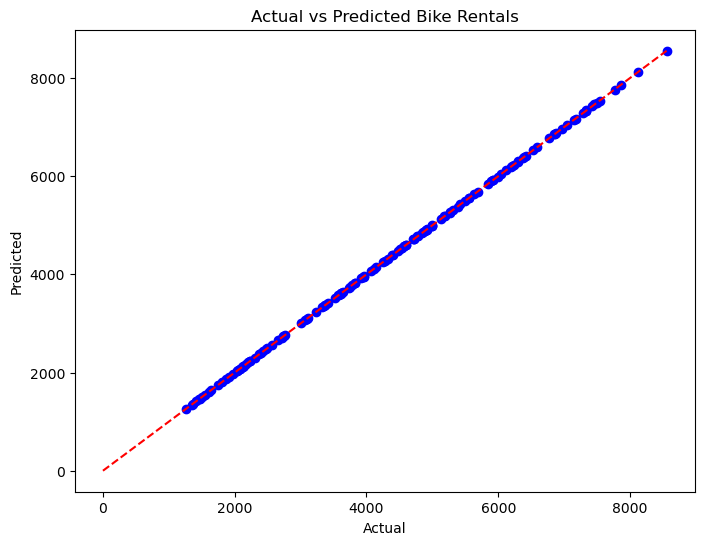

In [20]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Bike Rentals')
plt.show()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Convert X_train to numeric and handle any missing values
X_train_numeric = X_train.select_dtypes(include=[np.number])  # Select only numeric columns
X_train_numeric = X_train_numeric.fillna(0)  # Handle missing values

# Calculate VIF
vif = pd.DataFrame()
vif['features'] = X_train_numeric.columns
vif['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

      features      VIF
0      instant  2317.64
9        atemp  1471.89
8         temp  1252.91
2           yr   876.40
3         mnth   660.76
10         hum    30.88
12         cnt    30.11
1       season    27.33
7   weathersit    14.38
11   windspeed     5.65
6   workingday     3.29
5      weekday     3.14
4      holiday     1.11
